# LHII Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

import mdtraj
import itertools

import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}


matplotlib.rc('font', **font)

4998
9998
9998


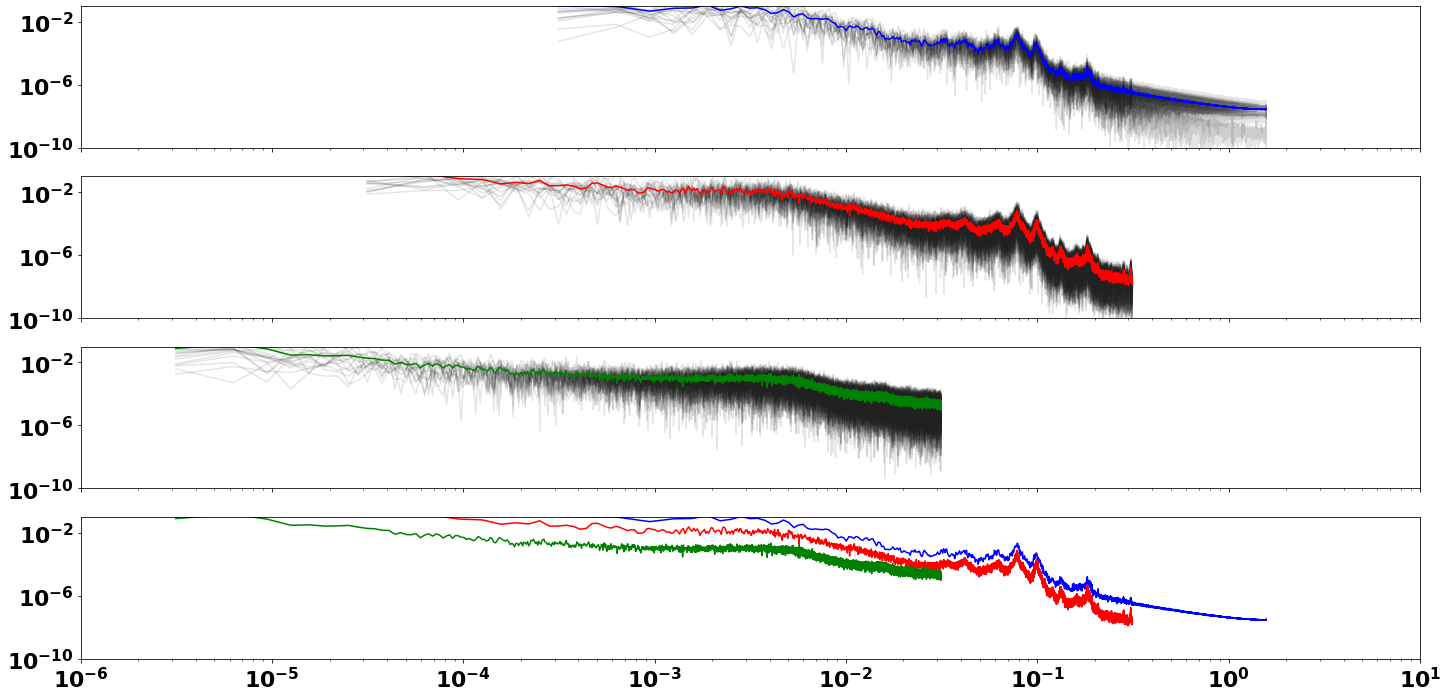

In [12]:
def first_half(arr):
    return arr[1:len(arr)//2]

spectra_1000ps, domain_1000ps = np.load('1000ps_100fs_LHII_spectra.npy'), np.load('1000ps_100fs_LHII_domain.npy')
spectra_100ps, domain_100ps = np.load('100ps_10fs_LHII_spectra.npy'), np.load('100ps_10fs_LHII_domain.npy')
spectra_10ps, domain_10ps = np.load('10ps_2fs_LHII_spectra.npy'), np.load('10ps_2fs_LHII_domain.npy')

fig, ax = plt.subplots(4,1, sharex=True, sharey=True)

ax[0].set_xlim(1e-6,10)
ax[0].set_ylim(1e-10, 0.1)
ax[0].set_xscale('log')
ax[0].set_yscale('log')

for i in range(spectra_10ps.shape[0]):
    ax[0].plot(first_half(domain_10ps), first_half(abs(spectra_10ps[i])), alpha=0.1, color='black')

for i in range(spectra_100ps.shape[0]):
    ax[1].plot(first_half(domain_100ps), first_half(abs(spectra_100ps[i])), alpha=0.1, color='black')

for i in range(spectra_1000ps.shape[0]):
    ax[2].plot(first_half(domain_1000ps), first_half(abs(spectra_1000ps[i])), alpha=0.1, color='black')


avg_spectra_10ps = first_half(np.mean(abs(spectra_10ps), axis=0))
avg_spectra_100ps = first_half(np.mean(abs(spectra_100ps), axis=0))
avg_spectra_1000ps = first_half(np.mean(abs(spectra_1000ps), axis=0))

ax[0].plot(first_half(domain_10ps), avg_spectra_10ps, color='blue')
ax[1].plot(first_half(domain_100ps), avg_spectra_100ps, color='red')
ax[2].plot(first_half(domain_1000ps), avg_spectra_1000ps, color='green')

ax[3].plot(first_half(domain_10ps), avg_spectra_10ps, color='blue')
ax[3].plot(first_half(domain_100ps), avg_spectra_100ps, color='red')
ax[3].plot(first_half(domain_1000ps), avg_spectra_1000ps, color='green')

fig.set_size_inches(24, 12)

print(len(first_half(domain_10ps)))
print(len(first_half(domain_100ps)))
print(len(first_half(domain_1000ps)))

 MD length : 0.10 ns, timesteps :   1 fs, highest period : 200 ps, lowest period : 2.0 fs
 MD length : 0.10 ns, timesteps :  20 fs, highest period : 200 ps, lowest period : 40.0 fs
 MD length : 0.10 ns, timesteps :  50 fs, highest period : 200 ps, lowest period : 100.0 fs
 MD length : 0.10 ns, timesteps :  100 fs, highest period : 200 ps, lowest period : 200.0 fs
 MD length : 0.10 ns, timesteps :  200 fs, highest period : 199 ps, lowest period : 400.0 fs
 MD length : 0.10 ns, timesteps :  500 fs, highest period : 198 ps, lowest period : 1000.0 fs
 MD length : 0.10 ns, timesteps :  1000 fs, highest period : 196 ps, lowest period : 2000.0 fs
 MD length : 1.00 ns, timesteps :   1 fs, highest period : 2000 ps, lowest period : 2.0 fs
 MD length : 1.00 ns, timesteps :  20 fs, highest period : 2000 ps, lowest period : 40.0 fs
 MD length : 1.00 ns, timesteps :  50 fs, highest period : 2000 ps, lowest period : 100.0 fs
 MD length : 1.00 ns, timesteps :  100 fs, highest period : 2000 ps, lowest 

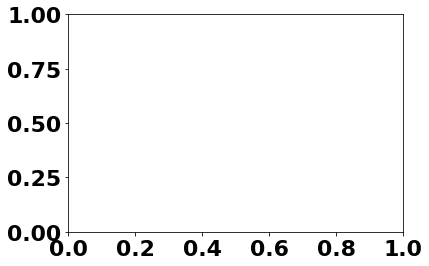

In [6]:
def resolution(length, timestep, cutoff=1):
    autocorr_length = 2 * (length - cutoff) - 2
        
    resolution = 1 / (timestep * autocorr_length)
    
    return resolution


def highest_frequency(timestep):
    return 1/(2*timestep)


fig, ax = plt.subplots()

MD_ns_lengths = [0.1, 1, 10, 100] # ns

timesteps = [1, 20, 50, 100, 200, 500, 1000] # fsbf

max_freqs = [highest_frequency(x) for x in timesteps]

res_mat = np.zeros((len(MD_ns_lengths), len(timesteps)))

for i, ns in enumerate(MD_ns_lengths):
    for j, dt in enumerate(timesteps):

        n_steps = 1e6 * ns / dt

        res, max_freq = resolution(n_steps, dt), highest_frequency(dt)
        
        print(f" MD length : {ns:2.2f} ns, timesteps : {dt : 3.0f} fs, highest period : {1e-3/res:3.0f} ps, lowest period : {1/max_freq} fs") 

In [ ]:
full_rmsd = mdtraj.rmsd(traj, traj, 0)
BCL_rmsd = mdtraj.rmsd(traj, traj, 0, atom_indices = BCL_atom_indices)

In [16]:
log = pd.read_csv("LH2_files/output/log.txt", sep="\t")
log["RMSD"] = full_rmsd
log["BCL RMSD"] = BCL_rmsd

ValueError: Length of values (2624) does not match length of index (4000)

In [13]:
log

,"#""Progress (%)""",Step,Potential Energy (kJ/mole),Temperature (K),Speed (ns/day)
0,0.0%,10,-2.868276e+06,300.578177,0.000
1,0.1%,20,-2.867977e+06,300.712337,0.483
2,0.1%,30,-2.868144e+06,300.805135,0.431
3,0.1%,40,-2.868425e+06,300.676495,0.444
4,0.1%,50,-2.868008e+06,300.446538,0.443
...,...,...,...,...,...
3995,99.9%,39960,-2.869814e+06,300.520701,0.448
3996,99.9%,39970,-2.870865e+06,300.675209,0.448
3997,100.0%,39980,-2.868822e+06,299.869208,0.448
3998,100.0%,39990,-2.868310e+06,299.991418,0.448


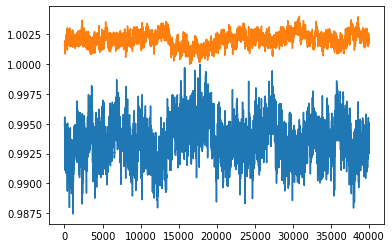

In [14]:
fig, ax = plt.subplots()

ax.plot(log.Step, log["Temperature (K)"]/max(log["Temperature (K)"]))
ax.plot(log.Step, log["Potential Energy (kJ/mole)"]/max(log["Potential Energy (kJ/mole)"]))

KeyError: 'RMSD'

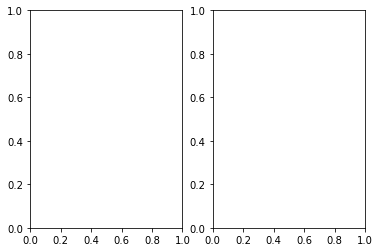

In [15]:
fig, ax = plt.subplots(1, 2)

log.plot("Step", "RMSD", ax=ax[0])
log.plot("Step", "BCL RMSD", ax=ax[1])

fig.set_size_inches(24, 12)